In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('ggplot')

In [42]:
def get_value(file_name):
    X, Y = [], []
    with open(file_name, "r") as f:
        log_reader = csv.DictReader(f, delimiter=",", quotechar="'")
        for line in log_reader:
            X.append(int(line['Step']))
            Y.append(float(line['Value']))
    return X, Y

def ema(series, alpha=0.1):
    series_ema = np.zeros_like(series)
    curr, ema_avg = 0.0, 0.0
    for i, x in enumerate(series):
        if i == 0:
            ema_avg = x
            series_ema[i] = ema_avg
        else:
            ema_avg = x * alpha + (1 - alpha) * ema_avg
            series_ema[i] = ema_avg
    return series_ema

In [44]:
acc_with_bn = "visualization/run_cifar10_cnn,tag_Accuracy.csv"
X1, Y1 = get_value(acc_with_bn)
Y1_ema = ema(Y1)

acc_without_bn = "visualization/run_cifar10_cnn_no_bn,tag_Accuracy.csv"
X2, Y2 = get_value(acc_without_bn)
Y2_ema = ema(Y2)

loss_with_bn = "visualization/run_cifar10_cnn,tag_Loss.csv"
X3, Y3 = get_value(loss_with_bn)
Y3_ema = ema(Y3)

loss_without_bn = "visualization/run_cifar10_cnn_no_bn,tag_Loss.csv"
X4, Y4 = get_value(loss_without_bn)
Y4_ema = ema(Y4)

fig, ax = plt.subplots(1, 2)
ax[0].plot(X1, Y1, color="grey", alpha = 0.5)
ax[0].plot(X1, Y1_ema, label="with batch normalization")

ax[0].plot(X2, Y2, color="grey", alpha = 0.5)
ax[0].plot(X2, Y2_ema, label="without batch normalization")

ax[0].set_xlabel("Numer of Iterations")
ax[0].set_ylabel("Training Accuracy")
ax[0].set_title("Effect of Batch Normalization")
ax[0].legend()

ax[1].plot(X3, Y3_ema, label="with batch normalization")
ax[1].plot(X3, Y3, color="grey", alpha = 0.5)

ax[1].plot(X4, Y4_ema, label="without batch normalization")
ax[1].plot(X4, Y4, color="grey", alpha = 0.5)

ax[1].set_xlabel("Numer of Iterations")
ax[1].set_ylabel("Training Loss")
ax[1].set_title("Effect of Batch Normalization")
ax[1].legend()

fig.savefig("visualization/effect_batch_normalization.png")

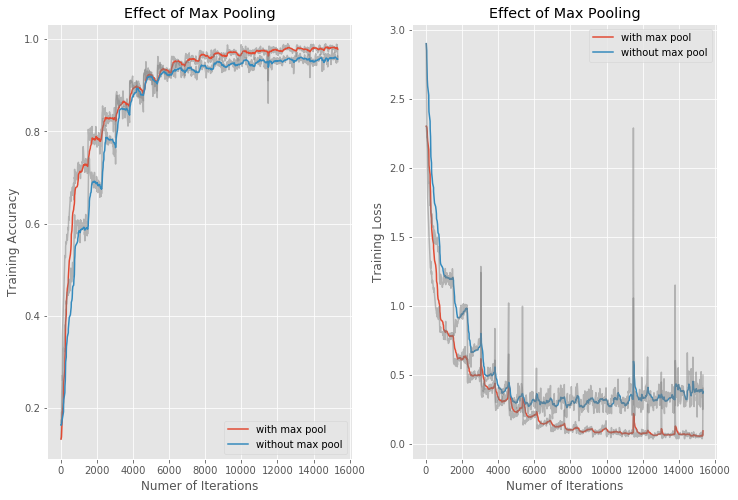

In [45]:
acc_without_maxpool = "visualization/run_cifar10_cnn_without_maxpool,tag_Accuracy.csv"
X5, Y5 = get_value(acc_without_maxpool)
Y5_ema = ema(Y5)

loss_without_maxpool = "visualization/run_cifar10_cnn_without_maxpool,tag_Loss.csv"
X6, Y6 = get_value(loss_without_maxpool)
Y6_ema = ema(Y6)

fig, ax = plt.subplots(1, 2)
ax[0].plot(X1, Y1, color="grey", alpha = 0.5)
ax[0].plot(X1, Y1_ema, label="with max pool")

ax[0].plot(X5, Y5, color="grey", alpha = 0.5)
ax[0].plot(X5, Y5_ema, label="without max pool")

ax[0].set_xlabel("Numer of Iterations")
ax[0].set_ylabel("Training Accuracy")
ax[0].set_title("Effect of Max Pooling")
ax[0].legend()

ax[1].plot(X3, Y3_ema, label="with max pool")
ax[1].plot(X3, Y3, color="grey", alpha = 0.5)

ax[1].plot(X6, Y6_ema, label="without max pool")
ax[1].plot(X6, Y6, color="grey", alpha = 0.5)

ax[1].set_xlabel("Numer of Iterations")
ax[1].set_ylabel("Training Loss")
ax[1].set_title("Effect of Max Pooling")
ax[1].legend()

fig.savefig("visualization/effect_max_pool.png")

# Plot the top 1, 5 and 25 accuracy

In [25]:
#for cifar10 data
lstm_acc = np.loadtxt('src/logs/lstm_cifar10_acc_only.txt'); lstm_acc = lstm_acc[::5]
# to be done
rs_acc = np.loadtxt('src/logs/rs_cifar10_acc_only.txt'); rs_acc = rs_acc[::5]

In [20]:
# for mnist data
lstm_acc = np.loadtxt('src/logs/lstm_acc_only.txt'); lstm_acc = lstm_acc[::2]
rs_acc = np.loadtxt('src/logs/rs_acc_only.txt'); rs_acc = rs_acc[::2]

In [3]:
lstm_acc.shape, rs_acc.shape

((800,), (800,))

In [26]:
from copy import deepcopy

def get_top_elements(lst):
    '''
    given a lst, return the 1st, 5th element in the first k element so far, for k in range(len(lst))
    '''
    N = len(lst)
    first = np.zeros_like(lst)
    fifth = np.zeros_like(lst)
    for n in range(1, N + 1):
        temp = deepcopy(lst[:n])
        temp.sort()
        first[n - 1] = temp[-1]
        if n > 5:
            fifth[n - 1] = np.average(temp[-5:-1])
        else:
            fifth[n - 1] = np.average(temp)
    return first, fifth

lstm_first, lstm_fifth = get_top_elements(lstm_acc)
rs_first, rs_fifth = get_top_elements(rs_acc)

In [22]:
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

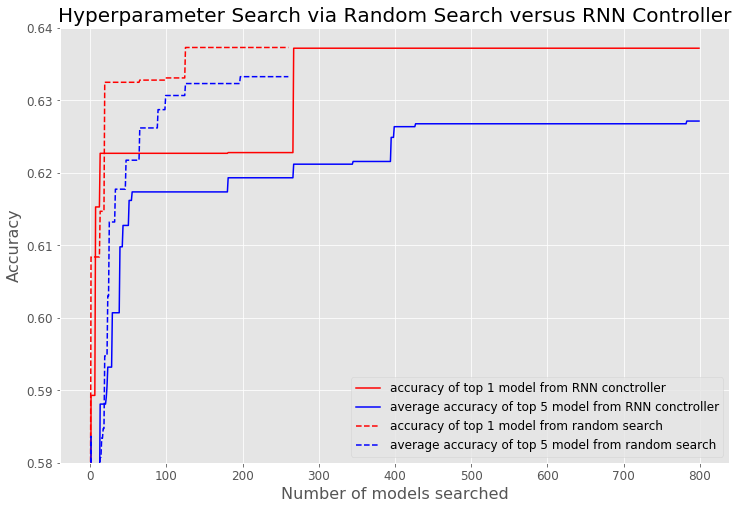

In [27]:
plt.plot(lstm_first, 'r-', label="accuracy of top 1 model from RNN conctroller")
plt.plot(lstm_fifth, 'b-', label="average accuracy of top 5 model from RNN conctroller")
plt.plot(rs_first, 'r--', label="accuracy of top 1 model from random search")
plt.plot(rs_fifth, 'b--', label="average accuracy of top 5 model from random search")

## range for cifar10 acc
plt.ylim(ymin=0.58, ymax=0.64)

## range for mnist acc
#plt.ylim(ymin = 0.9775, ymax=0.9875)
plt.xlabel('Number of models searched')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Search via Random Search versus RNN Controller')
plt.legend(loc='lower right')
plt.savefig('visualization/cifar10_rs_vs_lstm.png')

In [29]:
?plt.legend()